In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from toolbox import series_screw as ss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Import the ARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [21]:
df = pd.DataFrame([[('2013-01-01 00:00:00'), -259.8640246377437],
       [('2013-01-02 00:00:00'), 695.8038494489213],
       [('2013-01-03 00:00:00'), 25.50657751357907],
       [('2013-01-04 00:00:00'), -474.44706737564303],
       [('2013-01-05 00:00:00'), 450.3900565587408],
       [('2013-01-06 00:00:00'), 2579.5994164496983],
       [('2013-01-07 00:00:00'), 897.8365436386925],
       [('2013-01-08 00:00:00'), -136.4694308884659],
       [('2013-01-09 00:00:00'), 850.8917190339024],
       [('2013-01-10 00:00:00'), -38.13343884449811],
       [('2013-01-11 00:00:00'), -537.8103060652236],
       [('2013-01-12 00:00:00'), 551.0912255374992],
       [('2013-01-13 00:00:00'), 2659.8376689528086],
       [('2013-01-14 00:00:00'), 806.978421895405],
       [('2013-01-15 00:00:00'), -369.4550836097437],
       [('2013-01-16 00:00:00'), 955.8468046664298],
       [('2013-01-17 00:00:00'), -235.17633166318012],
       [('2013-01-18 00:00:00'), -693.2742980603264],
       [('2013-01-19 00:00:00'), 800.1129924037396],
       [('2013-01-20 00:00:00'), 3055.1474794171995],
       [('2013-01-21 00:00:00'), 762.2607318835953],
       [('2013-01-22 00:00:00'), -445.11579876837624],
       [('2013-01-23 00:00:00'), 1047.1691265504064],
       [('2013-01-24 00:00:00'), -240.75230471667538],
       [('2013-01-25 00:00:00'), -959.470959572207],
       [('2013-01-26 00:00:00'), 723.8741606362995],
       [('2013-01-27 00:00:00'), 3119.1366481121154],
       [('2013-01-28 00:00:00'), 533.8553045809915],
       [('2013-01-29 00:00:00'), -538.817700113386],
       [('2013-01-30 00:00:00'), 1254.5740154192351],
       [('2013-01-31 00:00:00'), -389.5992773848391],
       [('2013-02-01 00:00:00'), -1283.030784135434],
       [('2013-02-02 00:00:00'), 848.4326244706648],
       [('2013-02-03 00:00:00'), 2777.887701647582],
       [('2013-02-04 00:00:00'), 766.804377422316],
       [('2013-02-05 00:00:00'), -183.15537311876602],
       [('2013-02-06 00:00:00'), 1329.9921019517092],
       [('2013-02-07 00:00:00'), -542.4672510958048],
       [('2013-02-08 00:00:00'), -1435.723595832525],
       [('2013-02-09 00:00:00'), 934.1618857425724],
       [('2013-02-10 00:00:00'), 3075.3591143569874],
       [('2013-02-11 00:00:00'), 780.5299283867392],
       [('2013-02-12 00:00:00'), 72.83229592529436],
       [('2013-02-13 00:00:00'), 1269.2592803578875],
       [('2013-02-14 00:00:00'), -410.44554178133274],
       [('2013-02-15 00:00:00'), -1458.7106693251037],
       [('2013-02-16 00:00:00'), 761.8651525291335],
       [('2013-02-17 00:00:00'), 3181.2446134543234],
       [('2013-02-18 00:00:00'), 1042.4057344728749],
       [('2013-02-19 00:00:00'), 279.2124126653712],
       [('2013-02-20 00:00:00'), 1438.999577072921],
       [('2013-02-21 00:00:00'), -235.72030921287543],
       [('2013-02-22 00:00:00'), -1724.2026634433626],
       [('2013-02-23 00:00:00'), 928.937975821235],
       [('2013-02-24 00:00:00'), 3169.722602566776],
       [('2013-02-25 00:00:00'), 1250.8468738436611],
       [('2013-02-26 00:00:00'), 281.8568748034722],
       [('2013-02-27 00:00:00'), 1533.4501602809182],
       [('2013-02-28 00:00:00'), 6.90697729744123],
       [('2013-03-01 00:00:00'), -1505.5825949062287],
       [('2013-03-02 00:00:00'), 551.9775634719596],
       [('2013-03-03 00:00:00'), 2775.4332590260287],
       [('2013-03-04 00:00:00'), 1461.0652175818855],
       [('2013-03-05 00:00:00'), 227.33755227551455],
       [('2013-03-06 00:00:00'), 1841.9040588182158],
       [('2013-03-07 00:00:00'), 227.2471361274472],
       [('2013-03-08 00:00:00'), -1580.1217764862483],
       [('2013-03-09 00:00:00'), 679.8509021970691],
       [('2013-03-10 00:00:00'), 2302.5826116003213],
       [('2013-03-11 00:00:00'), 1406.8113676997832],
       [('2013-03-12 00:00:00'), -229.26715148439922],
       [('2013-03-13 00:00:00'), 1679.7496409721941],
       [('2013-03-14 00:00:00'), 441.4294667137771],
       [('2013-03-15 00:00:00'), -1594.3691393285942],
       [('2013-03-16 00:00:00'), 547.7934361277889],
       [('2013-03-17 00:00:00'), 1814.114380848165],
       [('2013-03-18 00:00:00'), 1207.1034480893609],
       [('2013-03-19 00:00:00'), -341.2606930515907],
       [('2013-03-20 00:00:00'), 1418.2246381070186],
       [('2013-03-21 00:00:00'), 513.4083496800424],
       [('2013-03-22 00:00:00'), -1844.9409294225254],
       [('2013-03-23 00:00:00'), 246.70940038441972],
       [('2013-03-24 00:00:00'), 1617.6769775775251],
       [('2013-03-25 00:00:00'), 1278.833245542072],
       [('2013-03-26 00:00:00'), -261.9397122456534],
       [('2013-03-27 00:00:00'), 1270.937970283074],
       [('2013-03-28 00:00:00'), 811.6384669170684],
       [('2013-03-29 00:00:00'), -1690.3663043229838],
       [('2013-03-30 00:00:00'), 335.5973218845467],
       [('2013-03-31 00:00:00'), 1391.4944828047605]],
             columns=['date', 'value'])

In [24]:
df.set_index('date',inplace=True)

In [29]:
# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMA model
model = SARIMAX(df, order=(1,0,0), seasonal_order=(1,1,0,7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             value   No. Observations:                   90
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -556.320
Date:                           Thu, 26 Jan 2023   AIC                           1118.640
Time:                                   18:55:52   BIC                           1125.896
Sample:                               01-01-2013   HQIC                          1121.555
                                    - 03-31-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1025      0.103      0.995      0.320      -0.099       0.304
ar.S.L7        0.2811      0.105      2.690

C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [32]:
aus_employment= pd.DataFrame([[('1978-01-01 00:00:00'), 5985.7],
       [('1978-02-01 00:00:00'), 6040.6],
       [('1978-03-01 00:00:00'), 6054.2],
       [('1978-04-01 00:00:00'), 6038.3],
       [('1978-05-01 00:00:00'), 6031.3],
       [('1978-06-01 00:00:00'), 6036.1],
       [('1978-07-01 00:00:00'), 6005.4],
       [('1978-08-01 00:00:00'), 6024.3],
       [('1978-09-01 00:00:00'), 6045.9],
       [('1978-10-01 00:00:00'), 6033.8],
       [('1978-11-01 00:00:00'), 6125.4],
       [('1978-12-01 00:00:00'), 5971.3],
       [('1979-01-01 00:00:00'), 6050.7],
       [('1979-02-01 00:00:00'), 6096.2],
       [('1979-03-01 00:00:00'), 6087.7],
       [('1979-04-01 00:00:00'), 6075.6],
       [('1979-05-01 00:00:00'), 6095.7],
       [('1979-06-01 00:00:00'), 6103.9],
       [('1979-07-01 00:00:00'), 6078.5],
       [('1979-08-01 00:00:00'), 6157.8],
       [('1979-09-01 00:00:00'), 6164.0],
       [('1979-10-01 00:00:00'), 6188.8],
       [('1979-11-01 00:00:00'), 6257.2],
       [('1979-12-01 00:00:00'), 6112.9],
       [('1980-01-01 00:00:00'), 6207.2],
       [('1980-02-01 00:00:00'), 6278.7],
       [('1980-03-01 00:00:00'), 6224.9],
       [('1980-04-01 00:00:00'), 6273.4],
       [('1980-05-01 00:00:00'), 6269.9],
       [('1980-06-01 00:00:00'), 6314.1],
       [('1980-07-01 00:00:00'), 6281.4],
       [('1980-08-01 00:00:00'), 6360.0],
       [('1980-09-01 00:00:00'), 6320.2],
       [('1980-10-01 00:00:00'), 6342.0],
       [('1980-11-01 00:00:00'), 6426.6],
       [('1980-12-01 00:00:00'), 6253.0],
       [('1981-01-01 00:00:00'), 6356.5],
       [('1981-02-01 00:00:00'), 6428.1],
       [('1981-03-01 00:00:00'), 6426.3],
       [('1981-04-01 00:00:00'), 6412.4],
       [('1981-05-01 00:00:00'), 6413.9],
       [('1981-06-01 00:00:00'), 6425.3],
       [('1981-07-01 00:00:00'), 6393.7],
       [('1981-08-01 00:00:00'), 6502.7],
       [('1981-09-01 00:00:00'), 6445.3],
       [('1981-10-01 00:00:00'), 6433.3],
       [('1981-11-01 00:00:00'), 6506.9],
       [('1981-12-01 00:00:00'), 6355.5],
       [('1982-01-01 00:00:00'), 6432.4],
       [('1982-02-01 00:00:00'), 6497.4],
       [('1982-03-01 00:00:00'), 6431.6],
       [('1982-04-01 00:00:00'), 6440.9],
       [('1982-05-01 00:00:00'), 6414.3],
       [('1982-06-01 00:00:00'), 6425.9],
       [('1982-07-01 00:00:00'), 6379.3],
       [('1982-08-01 00:00:00'), 6443.5],
       [('1982-09-01 00:00:00'), 6421.1],
       [('1982-10-01 00:00:00'), 6367.0],
       [('1982-11-01 00:00:00'), 6370.2],
       [('1982-12-01 00:00:00'), 6172.2],
       [('1983-01-01 00:00:00'), 6264.1],
       [('1983-02-01 00:00:00'), 6310.4],
       [('1983-03-01 00:00:00'), 6254.5],
       [('1983-04-01 00:00:00'), 6272.8],
       [('1983-05-01 00:00:00'), 6266.5],
       [('1983-06-01 00:00:00'), 6295.0],
       [('1983-07-01 00:00:00'), 6241.1],
       [('1983-08-01 00:00:00'), 6358.2],
       [('1983-09-01 00:00:00'), 6336.2],
       [('1983-10-01 00:00:00'), 6377.5],
       [('1983-11-01 00:00:00'), 6456.4],
       [('1983-12-01 00:00:00'), 6251.4],
       [('1984-01-01 00:00:00'), 6365.4],
       [('1984-02-01 00:00:00'), 6503.2],
       [('1984-03-01 00:00:00'), 6477.6],
       [('1984-04-01 00:00:00'), 6489.7],
       [('1984-05-01 00:00:00'), 6499.0],
       [('1984-06-01 00:00:00'), 6528.7],
       [('1984-07-01 00:00:00'), 6466.1],
       [('1984-08-01 00:00:00'), 6579.8],
       [('1984-09-01 00:00:00'), 6553.2],
       [('1984-10-01 00:00:00'), 6576.1],
       [('1984-11-01 00:00:00'), 6636.0],
       [('1984-12-01 00:00:00'), 6452.4],
       [('1985-01-01 00:00:00'), 6595.7],
       [('1985-02-01 00:00:00'), 6657.4],
       [('1985-03-01 00:00:00'), 6588.8],
       [('1985-04-01 00:00:00'), 6658.0],
       [('1985-05-01 00:00:00'), 6659.4],
       [('1985-06-01 00:00:00'), 6703.4],
       [('1985-07-01 00:00:00'), 6675.6],
       [('1985-08-01 00:00:00'), 6814.7],
       [('1985-09-01 00:00:00'), 6771.1],
       [('1985-10-01 00:00:00'), 6882.0],
       [('1985-11-01 00:00:00'), 6910.8],
       [('1985-12-01 00:00:00'), 6753.6],
       [('1986-01-01 00:00:00'), 6861.9],
       [('1986-02-01 00:00:00'), 6961.9],
       [('1986-03-01 00:00:00'), 6997.9],
       [('1986-04-01 00:00:00'), 6979.0],
       [('1986-05-01 00:00:00'), 7007.7],
       [('1986-06-01 00:00:00'), 6991.5],
       [('1986-07-01 00:00:00'), 6918.6],
       [('1986-08-01 00:00:00'), 7040.6],
       [('1986-09-01 00:00:00'), 7030.4],
       [('1986-10-01 00:00:00'), 7034.2],
       [('1986-11-01 00:00:00'), 7116.8],
       [('1986-12-01 00:00:00'), 6902.5],
       [('1987-01-01 00:00:00'), 7022.3],
       [('1987-02-01 00:00:00'), 7133.4],
       [('1987-03-01 00:00:00'), 7109.6],
       [('1987-04-01 00:00:00'), 7103.6],
       [('1987-05-01 00:00:00'), 7128.9],
       [('1987-06-01 00:00:00'), 7175.6],
       [('1987-07-01 00:00:00'), 7092.3],
       [('1987-08-01 00:00:00'), 7186.5],
       [('1987-09-01 00:00:00'), 7177.4],
       [('1987-10-01 00:00:00'), 7182.2],
       [('1987-11-01 00:00:00'), 7330.7],
       [('1987-12-01 00:00:00'), 7169.4],
       [('1988-01-01 00:00:00'), 7247.4],
       [('1988-02-01 00:00:00'), 7397.4],
       [('1988-03-01 00:00:00'), 7383.4],
       [('1988-04-01 00:00:00'), 7354.9],
       [('1988-05-01 00:00:00'), 7378.3],
       [('1988-06-01 00:00:00'), 7383.1],
       [('1988-07-01 00:00:00'), 7353.4],
       [('1988-08-01 00:00:00'), 7503.2],
       [('1988-09-01 00:00:00'), 7477.3],
       [('1988-10-01 00:00:00'), 7508.7],
       [('1988-11-01 00:00:00'), 7622.9],
       [('1988-12-01 00:00:00'), 7424.9],
       [('1989-01-01 00:00:00'), 7569.7],
       [('1989-02-01 00:00:00'), 7638.3],
       [('1989-03-01 00:00:00'), 7683.2],
       [('1989-04-01 00:00:00'), 7729.3],
       [('1989-05-01 00:00:00'), 7720.5],
       [('1989-06-01 00:00:00'), 7751.8],
       [('1989-07-01 00:00:00'), 7727.6],
       [('1989-08-01 00:00:00'), 7854.4],
       [('1989-09-01 00:00:00'), 7817.8],
       [('1989-10-01 00:00:00'), 7870.7],
       [('1989-11-01 00:00:00'), 7941.6],
       [('1989-12-01 00:00:00'), 7712.6],
       [('1990-01-01 00:00:00'), 7809.1],
       [('1990-02-01 00:00:00'), 7877.5],
       [('1990-03-01 00:00:00'), 7894.3],
       [('1990-04-01 00:00:00'), 7916.1],
       [('1990-05-01 00:00:00'), 7910.0],
       [('1990-06-01 00:00:00'), 7932.9],
       [('1990-07-01 00:00:00'), 7825.0],
       [('1990-08-01 00:00:00'), 7925.5],
       [('1990-09-01 00:00:00'), 7870.5],
       [('1990-10-01 00:00:00'), 7849.9],
       [('1990-11-01 00:00:00'), 7941.2],
       [('1990-12-01 00:00:00'), 7668.8],
       [('1991-01-01 00:00:00'), 7739.3],
       [('1991-02-01 00:00:00'), 7746.5],
       [('1991-03-01 00:00:00'), 7750.5]],columns=['date','people_employed'])

In [34]:
aus_employment.set_index('date',inplace=True)

# Escolhendo p,d,q e P,D,Q,S

Já foi dado que a sazonalidade é 12

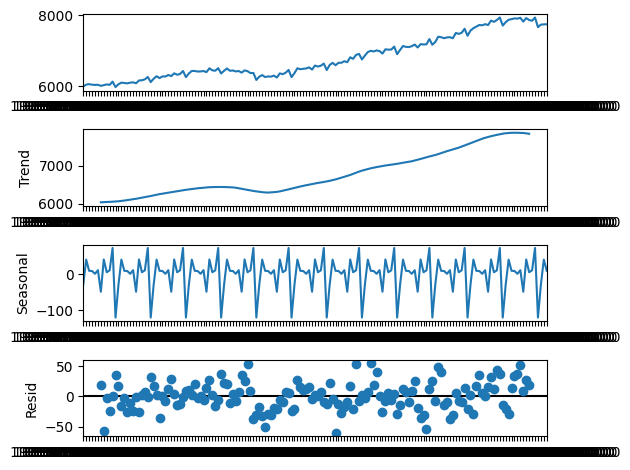

In [70]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(aus_employment, 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

<AxesSubplot: xlabel='date'>

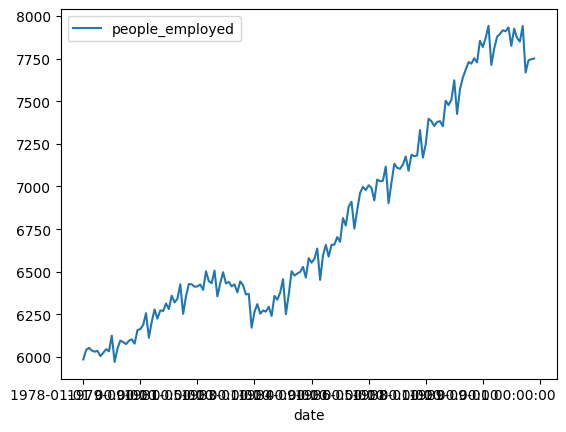

In [38]:
aus_employment.plot()

In [64]:
ss.adfuller_eval_sta(aus_employment)

'p_value: 0.5822067779704113 não podemos rejeitar Ho. Série Não Estacionária'

##  first order difference

In [54]:
aus_employment_diff = aus_employment.diff(12).dropna() # retirando sazonalidade.

<AxesSubplot: xlabel='date'>

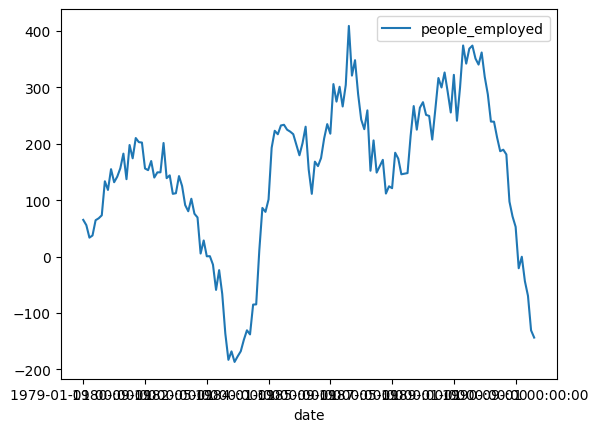

In [55]:
aus_employment_diff.plot()

In [56]:
ss.adfuller_eval_sta(aus_employment_diff)

'p_value: 0.5549740967696216 não podemos rejeitar Ho. Série Não Estacionária'

In [60]:
aus_employment_diff = aus_employment_diff.diff().dropna()

<AxesSubplot: xlabel='date'>

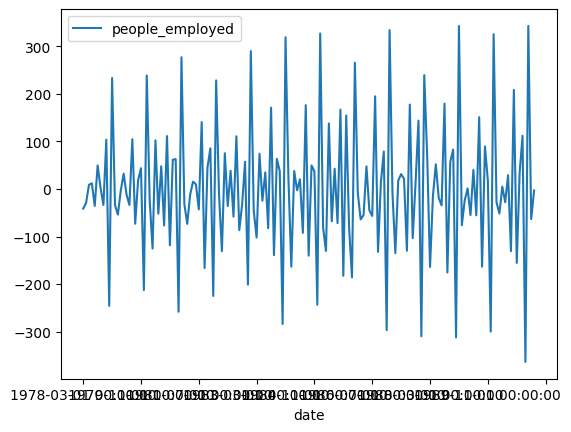

In [61]:
aus_employment_diff.plot()

In [62]:
ss.adfuller_eval_sta(aus_employment_diff)

'p_value: 1.095801056240513e-07 rejeita-se Ho. Esta séries é estacionária'

C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


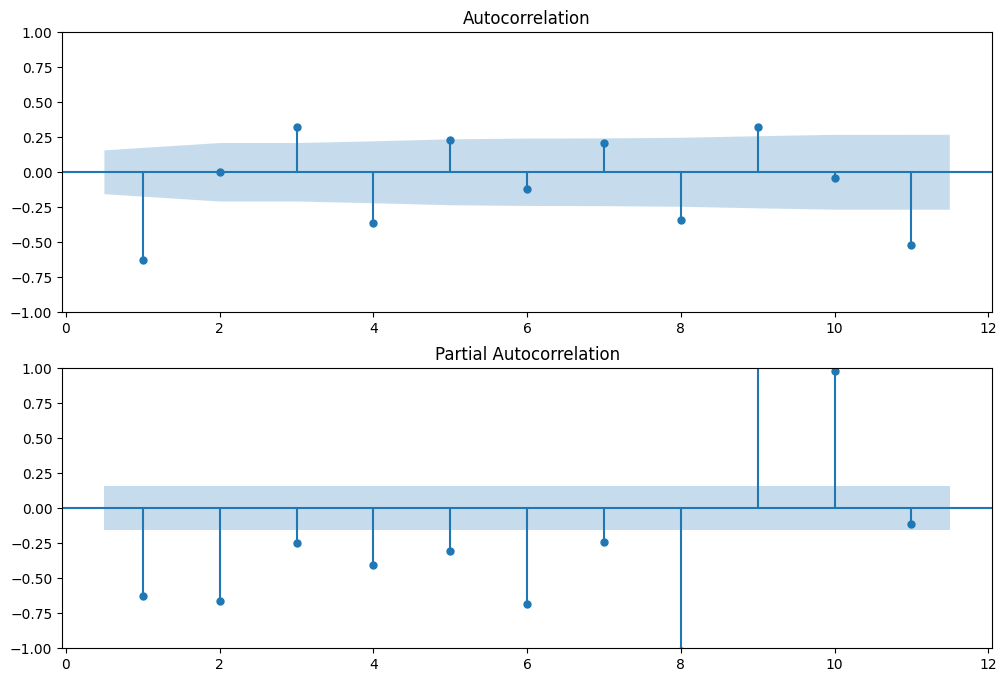

In [66]:
ss.acf_pacf(aus_employment_diff,lags=11)

# Seasonal ACF and PACF

C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


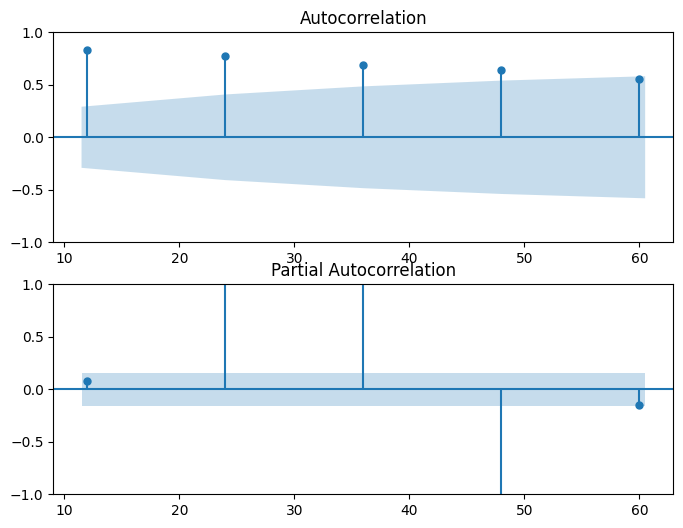

In [71]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=lags, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=lags, ax=ax2)

plt.show()

## Seasonal difference

In [ ]:
# Um ponto tirou a normalidade

In [41]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
milk_production = pd.read_csv('./data/milk_production.csv',index_col='date',parse_dates=True

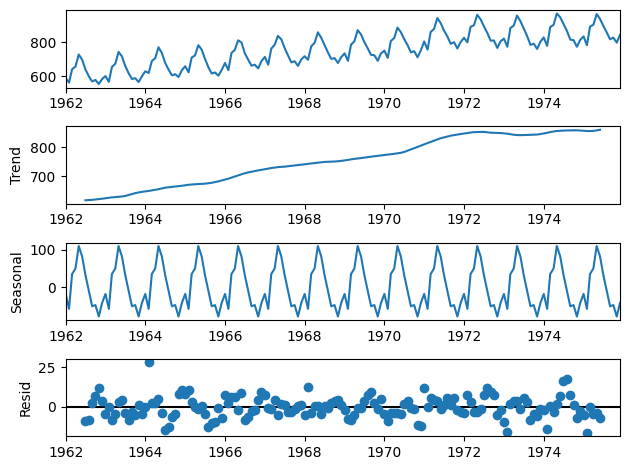

In [45]:
# Perform additive decomposition
decomp = seasonal_decompose(milk_production, 
                            period=12

# Plot decomposition
decomp.plot(
plt.show(

In [60]:
water = pd.read_csv('./data/water.csv',index_col='Unnamed: 0',parse_dates=True

In [61]:
water

,water_consumers
1983-01-01,24963
1983-02-01,27380
1983-03-01,32588
1983-04-01,25511
1983-05-01,32313
...,...
1993-12-01,32256
1994-01-01,27517
1994-02-01,33454
1994-03-01,38539


<AxesSubplot: >

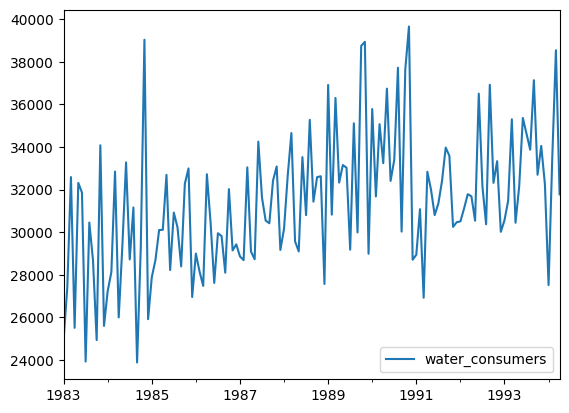

In [62]:
water.plot(

In [63]:
ss.adfuller_eval_sta(water

'p_value: 0.613163521611131 não podemos rejeitar Ho. Série Não Estacionária'

In [86]:
water_diff = water.pct_change(.dropna(

In [87]:
ss.adfuller_eval_sta(water_diff

'p_value: 0.05855269978465386 não podemos rejeitar Ho. Série Não Estacionária'

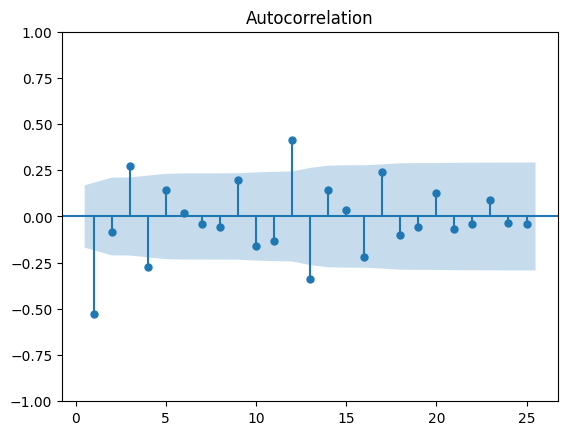

In [88]:
# Create figure and subplots
fig, ax1 = plt.subplots(

# Plot the ACF
plot_acf(water_diff, lags=25, zero=False, ax=ax1

# Show figure
plt.show(

Podemos ver picos para achar componente sazonal, no 12 temos um retorno para o pico, ou seja sazonalidade periodo de 12

In [76]:
import pmdarima as pm